## Advanced Regression (Ridge/Lasso)

## 1. Data Understanding and Preparation
### - DATA ANALYSIS

In [24]:
# import req libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
# read the data
base_df = pd.read_csv("train.csv")
base_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [26]:
print("DF shape -> ", base_df.shape)
print("DF info -> ", base_df.info())
base_df.describe()

DF shape ->  (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [27]:
# Calculate the percentage of missing values for each column
missing_data = pd.DataFrame({
    'Total_Missing': base_df.isnull().sum(),
    'Percentage': (base_df.isnull().sum() / len(base_df)) * 100
})

# Filter columns with missing values and sort by percentage
missing_data = missing_data[missing_data['Total_Missing'] > 0].sort_values('Percentage', ascending=False)
print(f"Total columns with missing values: {len(missing_data)}\n")
print(missing_data)

Total columns with missing values: 19

              Total_Missing  Percentage
PoolQC                 1453   99.520548
MiscFeature            1406   96.301370
Alley                  1369   93.767123
Fence                  1179   80.753425
MasVnrType              872   59.726027
FireplaceQu             690   47.260274
LotFrontage             259   17.739726
GarageType               81    5.547945
GarageYrBlt              81    5.547945
GarageFinish             81    5.547945
GarageQual               81    5.547945
GarageCond               81    5.547945
BsmtFinType2             38    2.602740
BsmtExposure             38    2.602740
BsmtFinType1             37    2.534247
BsmtCond                 37    2.534247
BsmtQual                 37    2.534247
MasVnrArea                8    0.547945
Electrical                1    0.068493


In [28]:
# Drop irrelevant columns with high missing values
columns_to_drop = ['PoolQC', 'MiscFeature', 'MiscVal', 'Alley', 'Fence', 'Id']
columns_present = [col for col in columns_to_drop if col in base_df.columns]
base_df = base_df.drop(columns=columns_present)

print(f"\nDropped {len(columns_present)} irrelevant columns: {columns_present}")
print(f"Dataset shape after dropping columns: {base_df.shape}")

# numerical columns
numerical_cols = base_df.select_dtypes(include=['int64', 'float64']).columns

# categorical columns
categorical_cols = base_df.select_dtypes(include=['object']).columns

# Replace null/nan values with median for numerical columns
for col in numerical_cols:
    if base_df[col].isnull().sum() > 0:
        median_value = base_df[col].median()
        base_df[col].fillna(median_value, inplace=True)
        print(f"Filled {col}: {base_df[col].isnull().sum()} nulls with median {median_value:.2f}")



Dropped 6 irrelevant columns: ['PoolQC', 'MiscFeature', 'MiscVal', 'Alley', 'Fence', 'Id']
Dataset shape after dropping columns: (1460, 75)
Filled LotFrontage: 0 nulls with median 69.00
Filled MasVnrArea: 0 nulls with median 0.00
Filled GarageYrBlt: 0 nulls with median 1980.00


#### Data Analysis
Understanding the distribution of numerical vs categorical features

In [29]:
print(f"Total Features: {len(base_df.columns)}")
print(f"Numerical Features: {len(numerical_cols)}")
print(f"Categorical Features: {len(categorical_cols)}")
print(f"\nNumerical Features:\n{numerical_cols}")
print(f"\nCategorical Features:\n{categorical_cols}")

Total Features: 75
Numerical Features: 36
Categorical Features: 39

Numerical Features:
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

Categorical Features:
Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQ

#### Target Variable Analysis (SalePrice)

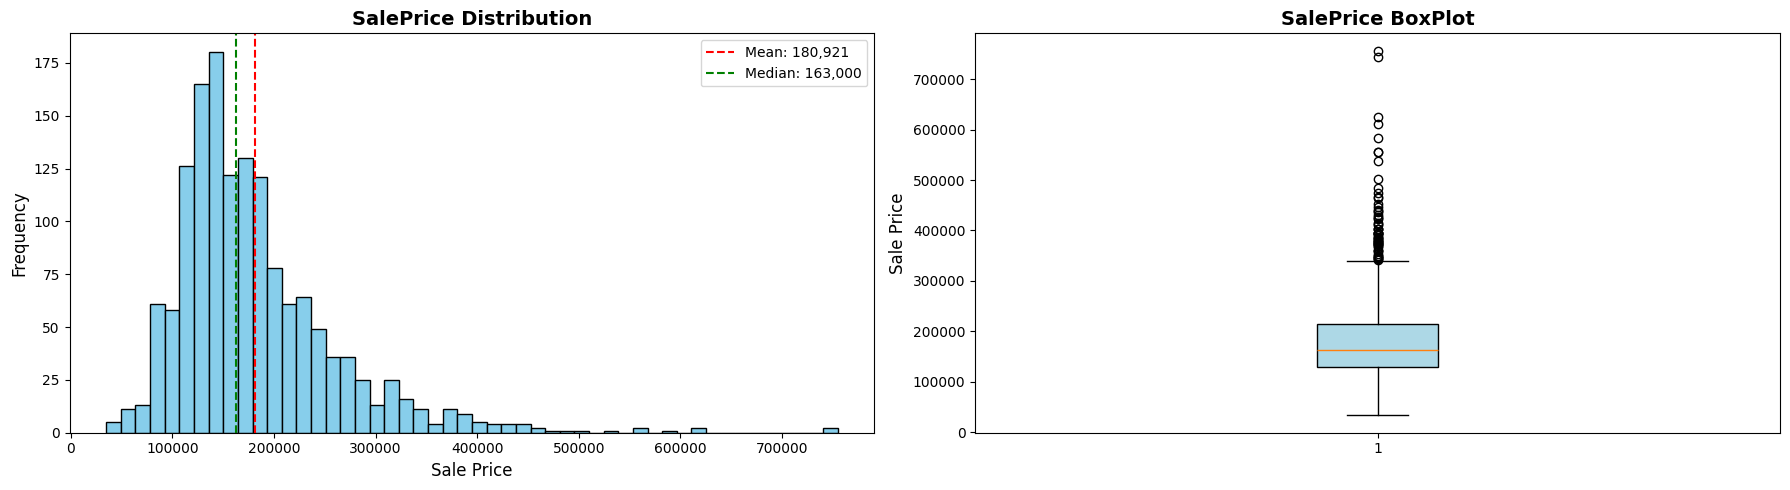

SalePrice Statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [30]:
# Analyze the target variable (SalePrice)
target = 'SalePrice'
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Distribution plot
axes[0].hist(base_df[target], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('SalePrice Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sale Price', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(base_df[target].mean(), color='red', linestyle='--', label=f'Mean: {base_df[target].mean():,.0f}')
axes[0].axvline(base_df[target].median(), color='green', linestyle='--', label=f'Median: {base_df[target].median():,.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(base_df[target], vert=True, patch_artist=True, 
                boxprops=dict(facecolor='lightblue'))
axes[1].set_title('SalePrice BoxPlot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sale Price', fontsize=12)

plt.tight_layout()
plt.show()

print(f"SalePrice Statistics:")
print(base_df[target].describe())

#### Univariate Analysis
Numerical features

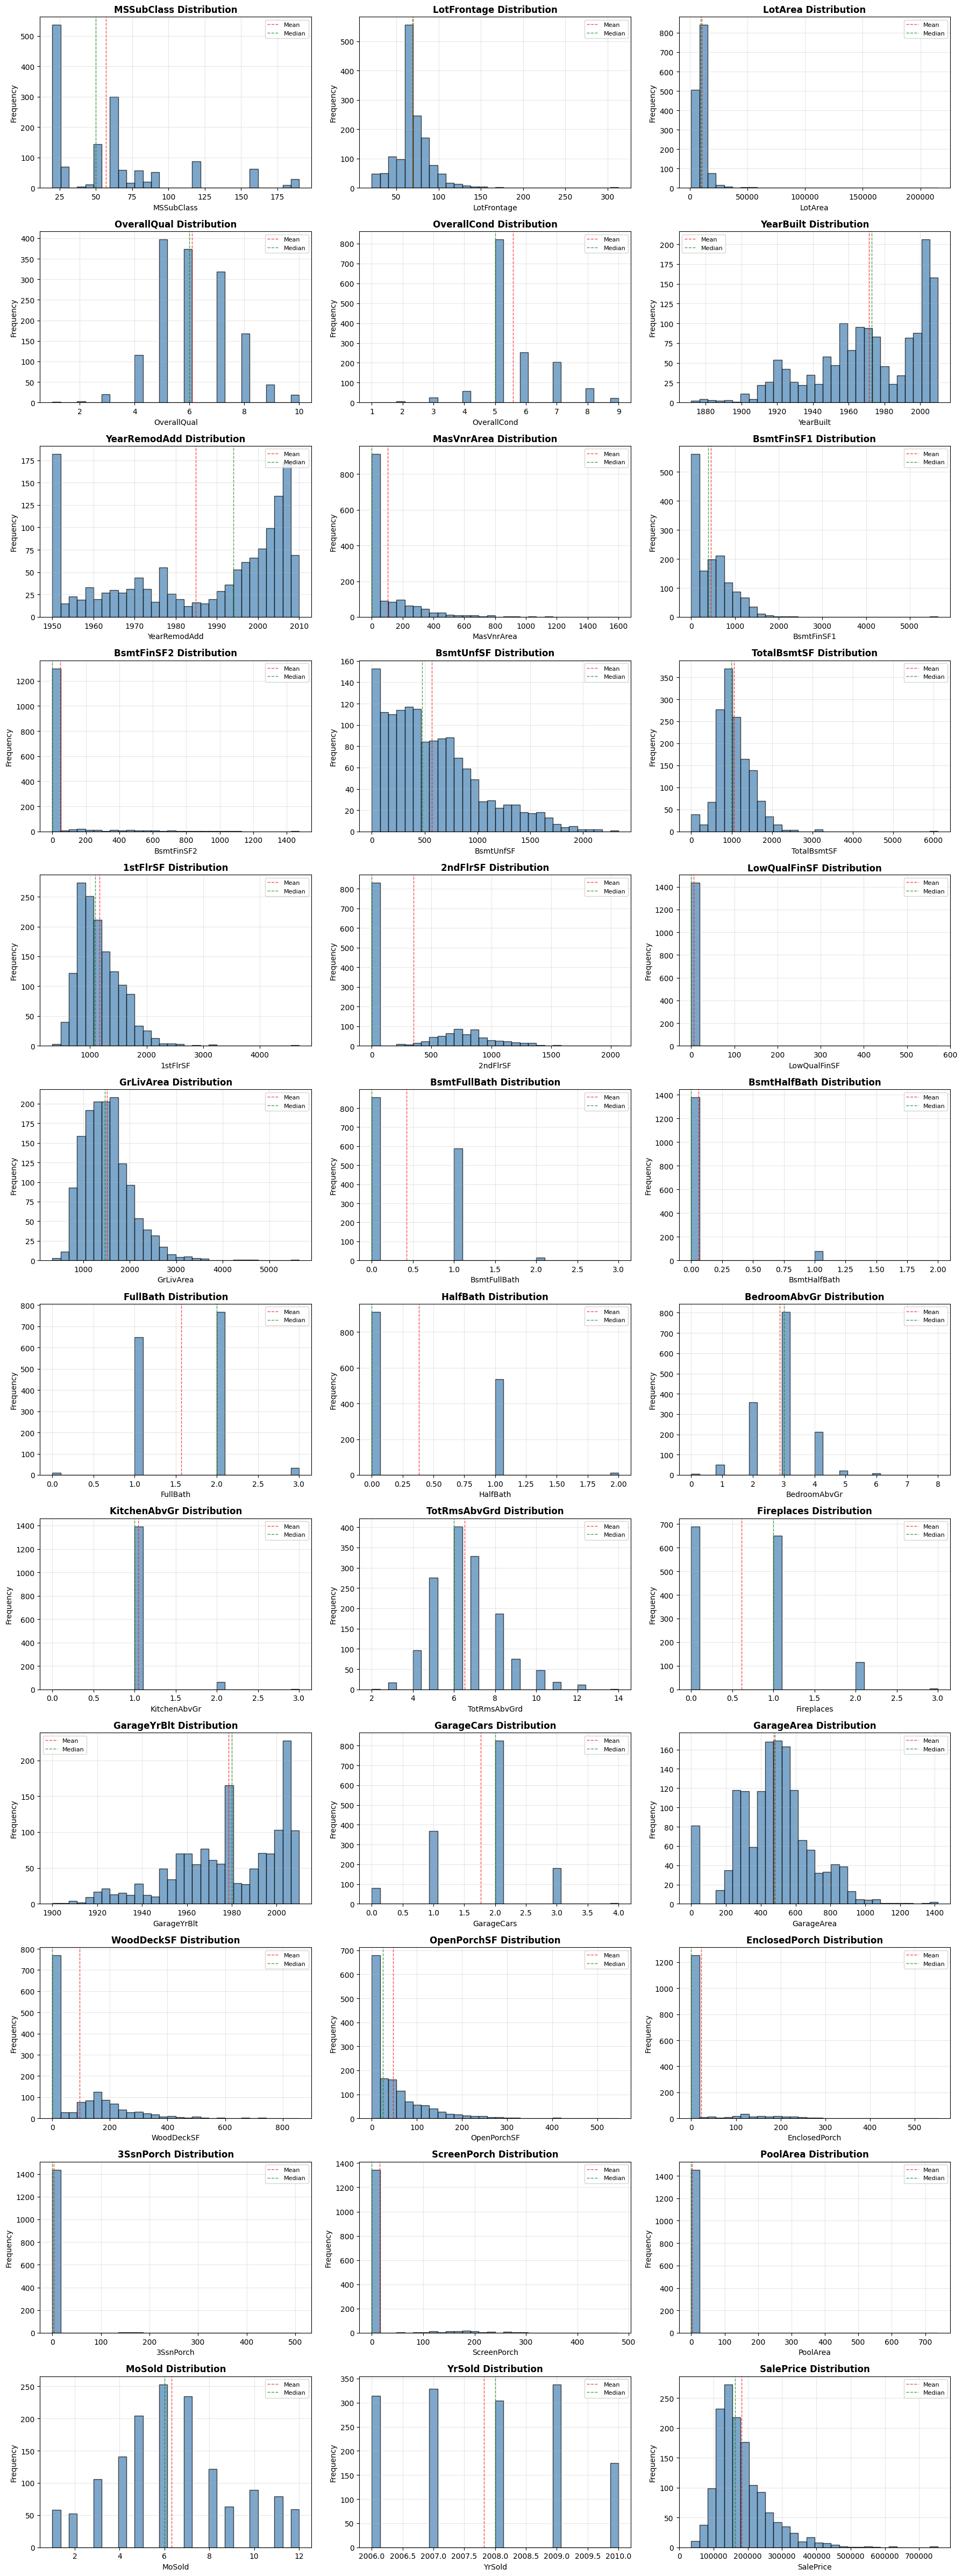

In [31]:
# Distributions of all numerical features
plot_features = list(numerical_cols)
n_features = len(plot_features)

# Calculate grid size dynamically
n_cols = 3
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for index, feature in enumerate(plot_features):
    axes[index].hist(base_df[feature].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[index].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[index].set_xlabel(feature, fontsize=10)
    axes[index].set_ylabel('Frequency', fontsize=10)
    axes[index].grid(True, alpha=0.3)
    
    # Add mean and median lines
    mean_val = base_df[feature].mean()
    median_val = base_df[feature].median()
    axes[index].axvline(mean_val, color='red', linestyle='--', linewidth=1, alpha=0.7, label='Mean')
    axes[index].axvline(median_val, color='green', linestyle='--', linewidth=1, alpha=0.7, label='Median')
    axes[index].legend(fontsize=8)

plt.tight_layout()
plt.show()


#### Correlation Analysis

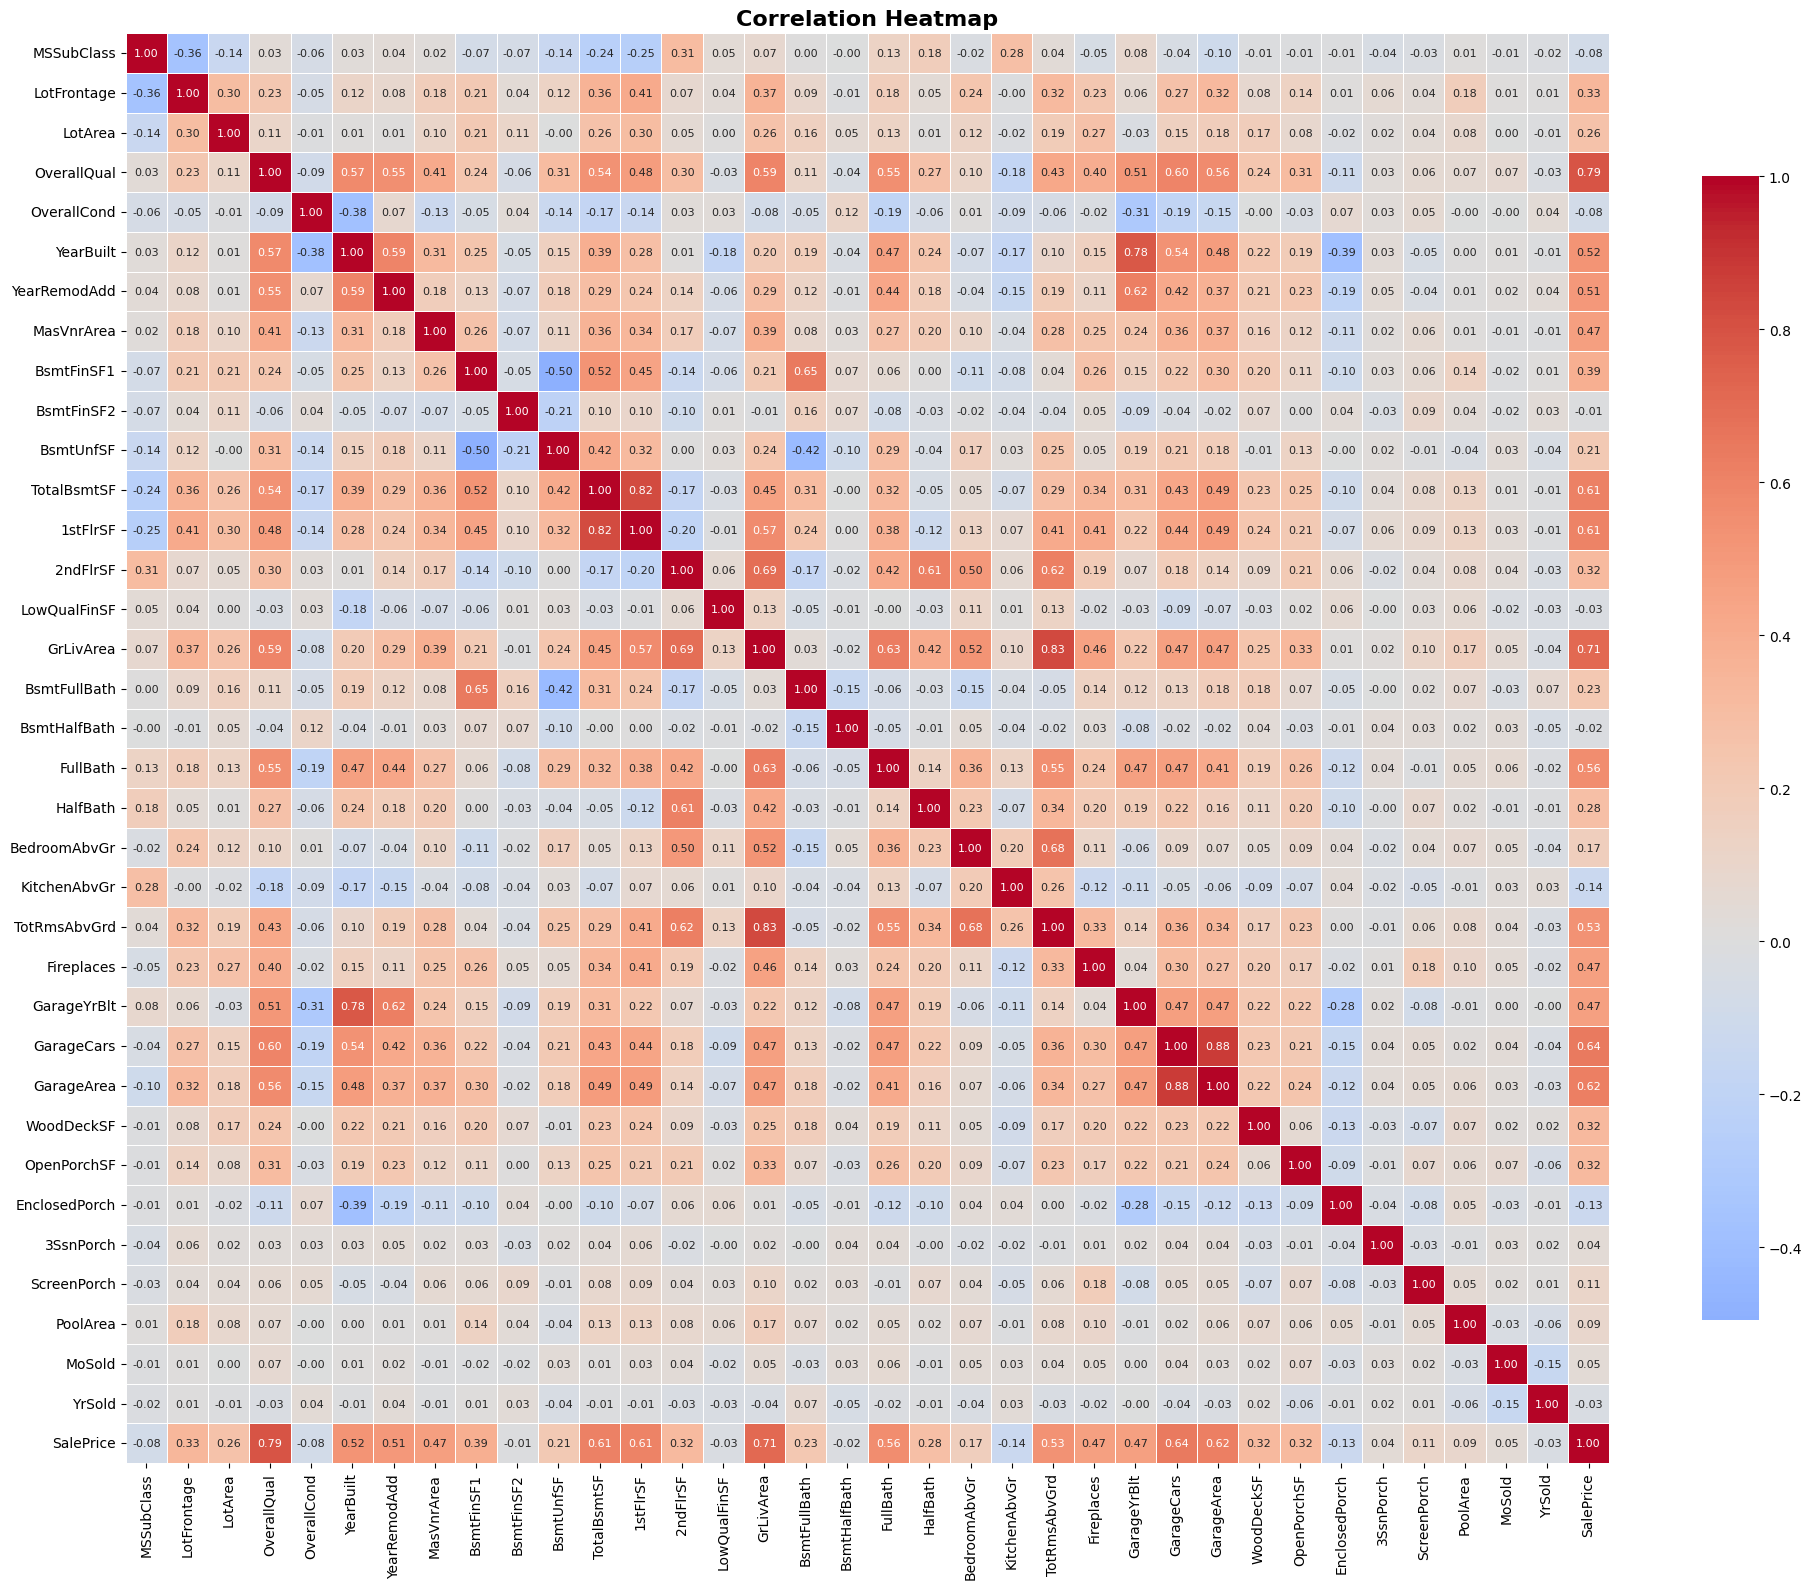

Top 10 Features Most Correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [32]:
# correlation matrix for numerical features
if target:
    correlation_matrix = base_df[numerical_cols].corr()
    
    # heatmap
    plt.figure(figsize=(20, 16))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
                linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 8})
    plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Top correlations with SalePrice
    target_corr = correlation_matrix[target].sort_values(ascending=False)
    print(f"Top 10 Features Most Correlated with {target}:")
    print(target_corr.head(11))

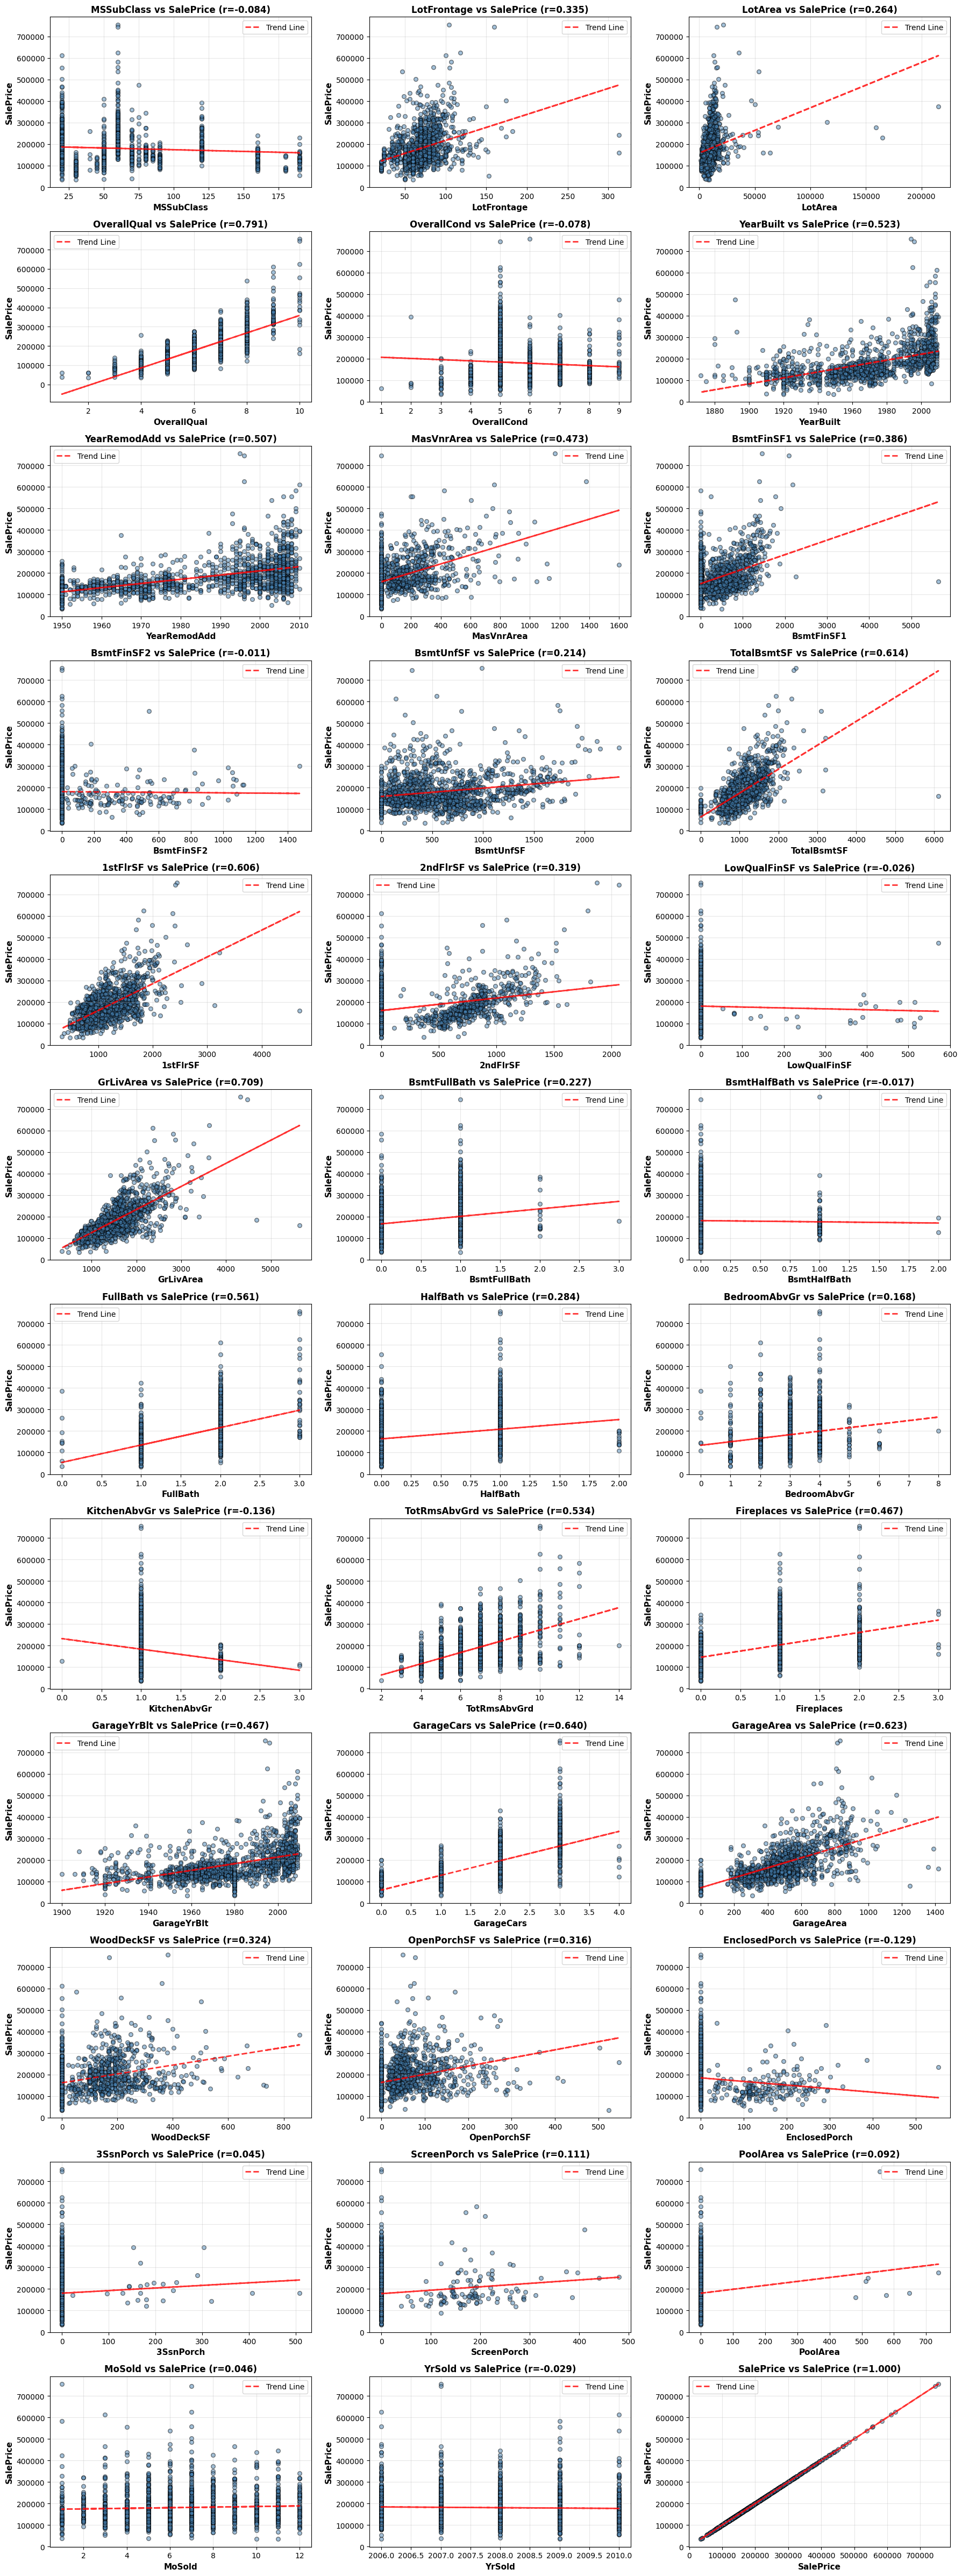

In [33]:
# Scatter plots for features with SalePrice (target)
if target:
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    axes = axes.flatten()
    
    for index, feature in enumerate(numerical_cols):
        axes[index].scatter(base_df[feature], base_df[target], alpha=0.5, color='steelblue', edgecolors='black', s=30)
        axes[index].set_xlabel(feature, fontsize=11, fontweight='bold')
        axes[index].set_ylabel('SalePrice', fontsize=11, fontweight='bold')
        axes[index].set_title(f'{feature} vs SalePrice (r={target_corr[feature]:.3f})', fontsize=12, fontweight='bold')
        axes[index].grid(True, alpha=0.3)
        
        # Add regression line
        z = np.polyfit(base_df[feature].dropna(), base_df[target][base_df[feature].notna()], 1)
        p = np.poly1d(z)
        axes[index].plot(base_df[feature].dropna(), p(base_df[feature].dropna()), 
                      "r--", linewidth=2, alpha=0.8, label='Trend Line')
        axes[index].legend()
    
    plt.tight_layout()
    plt.show()

#### Categorical Features Analysis

In [34]:
# Analyze categorical features - Count and unique values
plot_features = list(categorical_cols)
cat_features = len(plot_features)

# Calculate grid size dynamically
cat_cols = 3
cat_rows = int(np.ceil(cat_features / cat_cols))



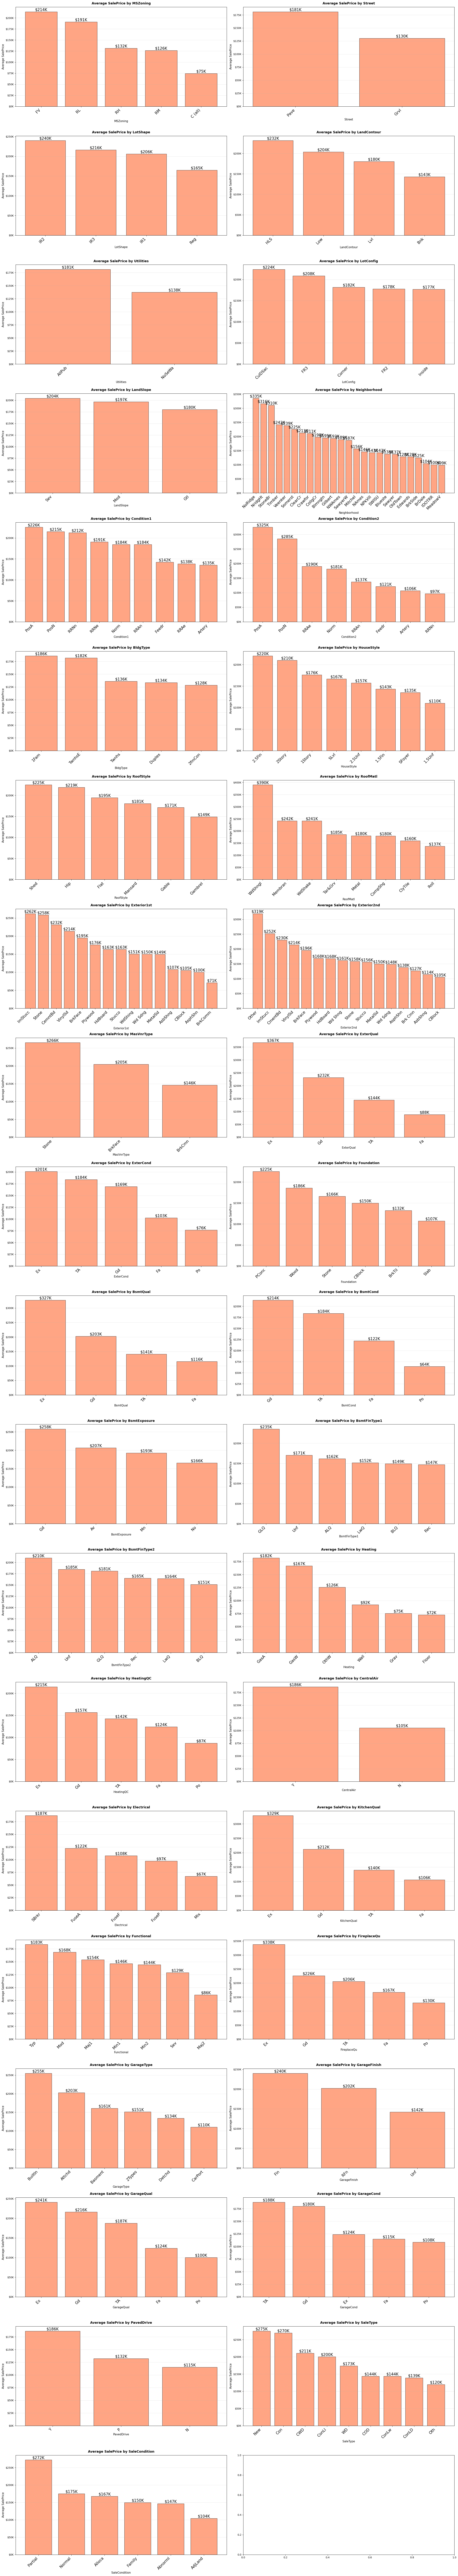

In [35]:
cat_features_to_plot = list(categorical_cols)
n_cat_features = len(cat_features_to_plot)

# Calculate grid size dynamically
cat_cols = 2
cat_rows = int(np.ceil(n_cat_features / cat_cols))

fig, axes = plt.subplots(cat_rows, cat_cols, figsize=(25, cat_rows * 7))
axes = axes.flatten()

for index, feature in enumerate(cat_features_to_plot):
    # Calculate mean SalePrice for each category
    cat_price = base_df.groupby(feature)[target].mean().sort_values(ascending=False)
    
    axes[index].bar(range(len(cat_price)), cat_price.values, color='coral', edgecolor='black', alpha=0.7)
    axes[index].set_xticks(range(len(cat_price)))
    axes[index].set_xticklabels(cat_price.index, rotation=45, ha='right', fontsize=15)
    axes[index].set_title(f'Average SalePrice by {feature}', fontsize=13, fontweight='bold', pad=10)
    axes[index].set_xlabel(feature, fontsize=11)
    axes[index].set_ylabel('Average SalePrice', fontsize=11)
    axes[index].grid(True, alpha=0.3, axis='y')
    axes[index].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
    for i, v in enumerate(cat_price.values):
        axes[index].text(i, v, f'${v/1000:.0f}K', ha='center', va='bottom', fontsize=15)

plt.tight_layout()
plt.show()


#### Outlier Detection
Identifying outliers in numerical features using box plots and IQR method

In [36]:
# Detect outliers using IQR

outlier_summary = {}

for index, feature in enumerate(numerical_cols):
    # Calculate IQR
    Q1 = base_df[feature].quantile(0.25)
    Q3 = base_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = base_df[(base_df[feature] < lower_bound) | (base_df[feature] > upper_bound)][feature]
    outlier_summary[feature] = len(outliers)
    
print(f"Outlier Summary (IQR Method):")

for feature, count in sorted(outlier_summary.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature:20s}: {count:4d} outliers")

Outlier Summary (IQR Method):
EnclosedPorch       :  208 outliers
BsmtFinSF2          :  167 outliers
OverallCond         :  125 outliers
ScreenPorch         :  116 outliers
LotFrontage         :  106 outliers
MSSubClass          :  103 outliers
MasVnrArea          :   98 outliers
BsmtHalfBath        :   82 outliers
OpenPorchSF         :   77 outliers
LotArea             :   69 outliers
KitchenAbvGr        :   68 outliers
TotalBsmtSF         :   61 outliers
SalePrice           :   61 outliers
BedroomAbvGr        :   35 outliers
WoodDeckSF          :   32 outliers
GrLivArea           :   31 outliers
TotRmsAbvGrd        :   30 outliers
BsmtUnfSF           :   29 outliers
LowQualFinSF        :   26 outliers
3SsnPorch           :   24 outliers
GarageArea          :   21 outliers
1stFlrSF            :   20 outliers
YearBuilt           :    7 outliers
BsmtFinSF1          :    7 outliers
PoolArea            :    7 outliers
Fireplaces          :    5 outliers
GarageCars          :    5 outlier

### - Data Preparation
Now let's handle missing values, outliers, and prepare the data for modeling

In [37]:
# Create a copy of the dataframe for cleaning
df_clean = base_df.copy()

print(f"Original dataset shape: {df_clean.shape}")
print(f"Total missing values: {df_clean.isnull().sum().sum()}")

Original dataset shape: (1460, 75)
Total missing values: 2074


In [38]:
# 1. For numerical features: Fill with median
# 2. For categorical features: Fill with mode

num_features_in_clean = df_clean.select_dtypes(include=['int64', 'float64']).columns
for col in num_features_in_clean:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"Filled {col} with median: {median_val}")

cat_features_in_clean = df_clean.select_dtypes(include=['object']).columns
for col in cat_features_in_clean:
    if df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()[0]
        df_clean[col].fillna(mode_val, inplace=True)
        print(f"Filled {col} with mode: {mode_val}")

print(f"Total missing values: {df_clean.isnull().sum().sum()}")
print(f"Dataset shape: {df_clean.shape}")

Filled MasVnrType with mode: BrkFace
Filled BsmtQual with mode: TA
Filled BsmtCond with mode: TA
Filled BsmtExposure with mode: No
Filled BsmtFinType1 with mode: Unf
Filled BsmtFinType2 with mode: Unf
Filled Electrical with mode: SBrkr
Filled FireplaceQu with mode: Gd
Filled GarageType with mode: Attchd
Filled GarageFinish with mode: Unf
Filled GarageQual with mode: TA
Filled GarageCond with mode: TA
Total missing values: 0
Dataset shape: (1460, 75)


#### Feature Engineering and Encoding

In [39]:
# Converts categorical variables into binary columns
print(f"Categorical columns to encode: {len(categorical_cols)}")
print(f"Shape before: {df_clean.shape}")
# create dummies and drop first
df_final = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True, dtype=int)
print(f"Shape after: {df_final.shape}")

Categorical columns to encode: 39
Shape before: (1460, 75)
Shape after: (1460, 235)


## 2. Model Building and Evaluation

#### - Train-Test Split
Splitting data into training and testing sets (80-20 split)

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target variable
y = df_final[target]
X = df_final.drop([target], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100
)

#### - Feature scaling

In [41]:
# Standardize the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


In [42]:
# Common Function to evaluate model performance
def evaluate_model(y_train, y_test, y_train_pred, y_test_pred, model_name="Model"):
    # Calculate R2 scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    r2_diff = train_r2 - test_r2
    r2_diff_pct = (r2_diff / train_r2) * 100
    
    # Calculate MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    print(f"{model_name} Summary : ")
    print(f"Training R2: {train_r2:.4f}")
    print(f"Test R2: {test_r2:.4f}")
    print(f"R2 Difference: {r2_diff:.4f} ({r2_diff_pct:.2f}%)")
    print(f"Training MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    
    # Return metrics as dictionary
    return {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'r2_diff': r2_diff,
        'r2_diff_pct': r2_diff_pct,
        'train_mse': train_mse,
        'test_mse': test_mse
    }

---
## 3. Model Training and Evaluation
Building and comparing Linear, Ridge, and Lasso regression models

#### - Linear Regression Model

In [43]:
# Linear Regression model
from sklearn.feature_selection import RFE

lr_model = LinearRegression()

print(f"Total features before RFE: {X_train_scaled.shape[1]}")
selector = RFE(estimator=lr_model, n_features_to_select=50, step=1)
selector = selector.fit(X_train_scaled, y_train)
lr_model = selector.estimator_
# Transform the data to selected features
X_train_rfe = selector.transform(X_train_scaled)
X_test_rfe = selector.transform(X_test_scaled)

selected_features = X_train_scaled.columns[selector.support_]
print(f"Selected {len(selected_features)} features:")
print(selected_features.tolist())

print(f"Shape after RFE: {X_train_rfe.shape}")

# Make predictions
y_train_pred = lr_model.predict(X_train_rfe)
y_test_pred = lr_model.predict(X_test_rfe)

# Evaluate model performance
lr_metrics = evaluate_model(y_train, y_test, y_train_pred, y_test_pred, "Linear Regression")

Total features before RFE: 234
Selected 50 features:
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'GarageCars', 'PoolArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition2_PosN', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Sev', 'Functional_Typ', 'SaleType_New']
Shape after RFE: (1022, 50)
Linear Regression Summary : 
Training R2: 0.9327
Test R2: 0.829

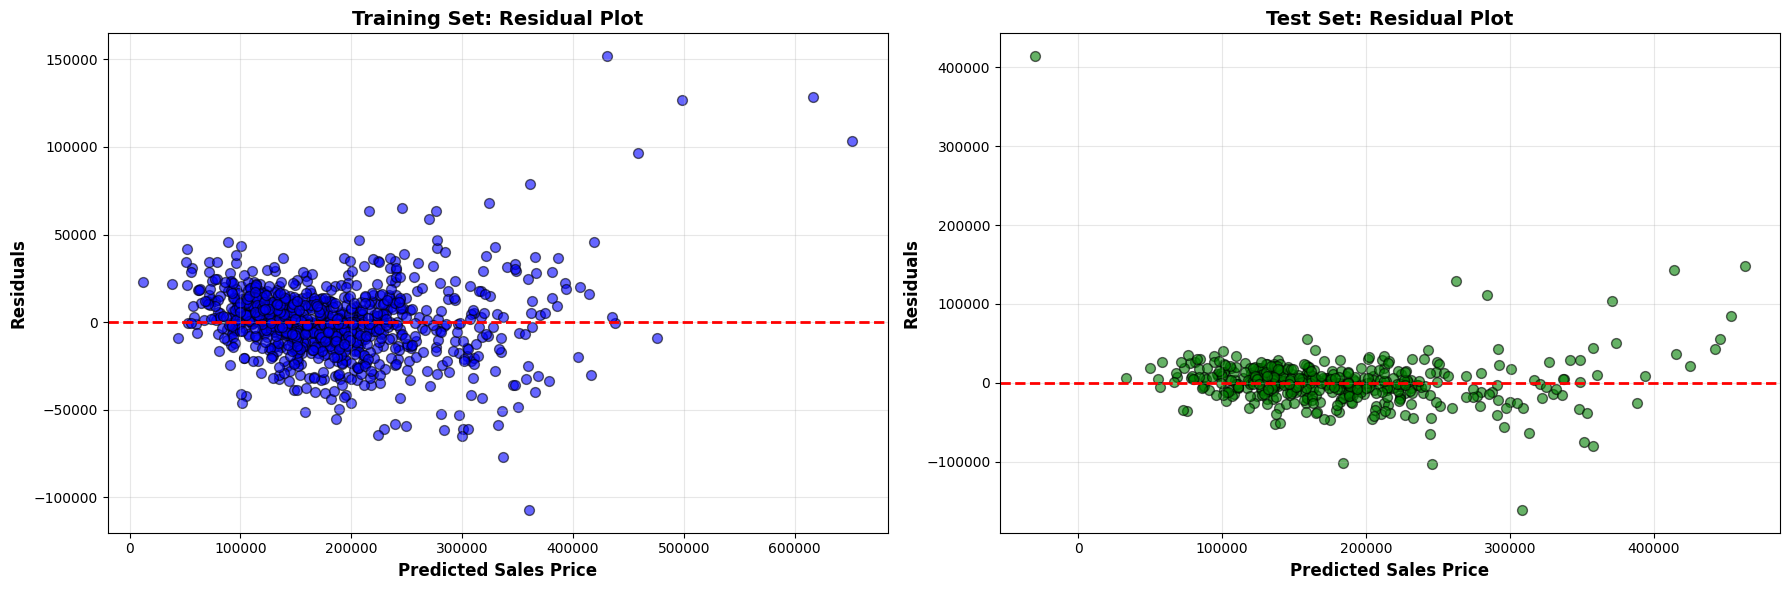

In [44]:
# Residual Analysis
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Training
train_residuals = y_train - y_train_pred
axes[0].scatter(y_train_pred, train_residuals, alpha=0.6, color='blue', edgecolors='black', s=50)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Sales Price', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Residuals', fontsize=12, fontweight='bold')
axes[0].set_title('Training Set: Residual Plot', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Test 
test_residuals = y_test - y_test_pred
axes[1].scatter(y_test_pred, test_residuals, alpha=0.6, color='green', edgecolors='black', s=50)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Sales Price', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Residuals', fontsize=12, fontweight='bold')
axes[1].set_title('Test Set: Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### we could see around 12% drop of r2 score in test data indicating there is a overfitting problem. Lets try to regularize!

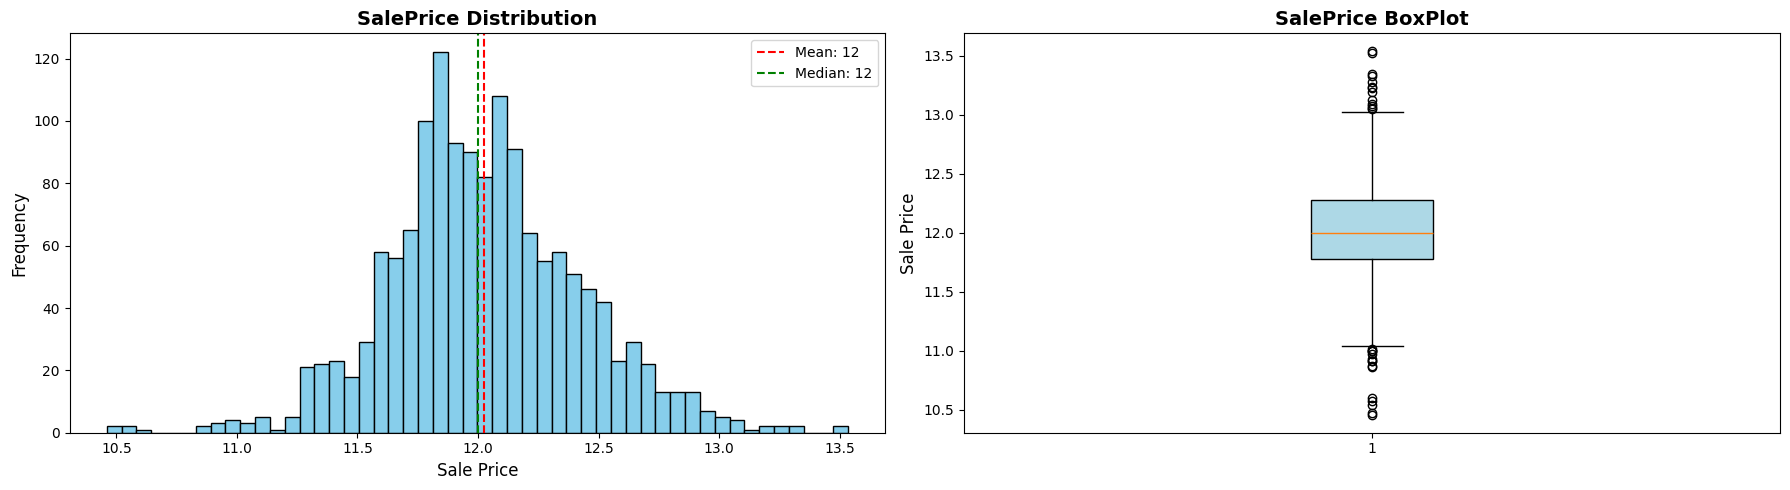

SalePrice Statistics:
count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64


In [45]:
# lets transform target to log scale as its skewed
df_final["SalePrice"] = np.log(df_final["SalePrice"])

# Separate features and target variable
y = df_final[target]
X = df_final.drop([target], axis=1)

# Analyze the target variable (SalePrice)
target = 'SalePrice'
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Distribution plot
axes[0].hist(df_final[target], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('SalePrice Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sale Price', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(df_final[target].mean(), color='red', linestyle='--', label=f'Mean: {df_final[target].mean():,.0f}')
axes[0].axvline(df_final[target].median(), color='green', linestyle='--', label=f'Median: {df_final[target].median():,.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df_final[target], vert=True, patch_artist=True, 
                boxprops=dict(facecolor='lightblue'))
axes[1].set_title('SalePrice BoxPlot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sale Price', fontsize=12)

plt.tight_layout()
plt.show()

print(f"SalePrice Statistics:")
print(df_final[target].describe())


### Regularization
#### - Lasso Regression

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100
)

# print(f"Total features before RFE: {X_train_scaled.shape[1]}")
# selector = RFE(estimator=lr_model, n_features_to_select=50, step=1)
# selector = selector.fit(X_train_scaled, y_train)
# lr_model = selector.estimator_
# # Transform the data to selected features
# X_train_rfe = selector.transform(X_train_scaled)
# X_test_rfe = selector.transform(X_test_scaled)

# selected_features = X_train_scaled.columns[selector.support_]
# print(f"Selected {len(selected_features)} features:")
# print(selected_features.tolist())

# print(f"Shape after RFE: {X_train_rfe.shape}")

In [54]:
# find the best alpha(lamda) using LassoCV
from sklearn.linear_model import LassoCV

alphas =np.logspace(-2, 2, 10)
lasso_cv = LassoCV(alphas=alphas, max_iter=1000, cv=5)
lasso_cv.fit(X_train_scaled, y_train)
print("Alpha : " , lasso_cv.alpha_)
print("Coef : " , lasso_cv.coef_)
print(f"Number of non-zero coefficients: {np.sum(lasso_cv.coef_ != 0)}")

Alpha :  0.01
Coef :  [-1.24044699e-02  0.00000000e+00  1.10521163e-02  1.08272118e-01
  2.67709516e-02  4.31534529e-02  2.69137955e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.74326549e-02
  4.52099231e-03  0.00000000e+00 -0.00000000e+00  1.20948256e-01
  2.09081406e-02  0.00000000e+00  6.00885564e-03  0.00000000e+00
  0.00000000e+00 -2.82203976e-03  2.00769720e-03  1.82093098e-02
  0.00000000e+00  4.64267651e-02  1.51939653e-03  7.53788430e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.56534727e-03
 -1.33210200e-02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.36774073e-02 -9.04405228e-03  0.00000000e+00
  0.00000000e+00 -4.56795788e-03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  5.10077068e-03
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  3.85386276e-03  0.00000000e+00  1.48465339e-02 -8.56592387e-03
 -0

In [48]:
y_pred_lasso_train = lasso_cv.predict(X_train_scaled)
y_pred_lasso_test = lasso_cv.predict(X_test_scaled)

# Evaluate model performance
lasso_metrics = evaluate_model(y_train, y_test, y_pred_lasso_train, y_pred_lasso_test, "Lasso Regression")

Lasso Regression Summary : 
Training R2: 0.8971
Test R2: 0.8634
R2 Difference: 0.0337 (3.76%)
Training MSE: 0.0162
Test MSE: 0.0225


In [59]:
# Perform RFE with Lasso regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

print(f"Total features before RFE: {X_train_scaled.shape[1]}")

# Use Lasso with a reasonable alpha for RFE
lasso_estimator = Lasso(alpha=0.01, max_iter=1000)
selector_lasso = RFE(estimator=lasso_estimator, n_features_to_select=100, step=1)
selector_lasso = selector_lasso.fit(X_train_scaled, y_train)

# Transform the data to selected features
X_train_lasso_rfe = selector_lasso.transform(X_train_scaled)
X_test_lasso_rfe = selector_lasso.transform(X_test_scaled)

selected_features_lasso = X_train_scaled.columns[selector_lasso.support_]
print(f"Selected {len(selected_features_lasso)} features for Lasso:")
print(selected_features_lasso.tolist())

print(f"Shape after RFE: {X_train_lasso_rfe.shape}")

# Now use LassoCV to find optimal alpha on the selected features
alphas = np.logspace(-2, 2, 10)
lasso_cv = LassoCV(alphas=alphas, max_iter=1000, cv=5)
lasso_cv.fit(X_train_lasso_rfe, y_train)

print(f"Optimal Alpha: {lasso_cv.alpha_}")
print(f"Number of non-zero coefficients: {np.sum(lasso_cv.coef_ != 0)}")

# Make predictions
y_pred_lasso_train = lasso_cv.predict(X_train_lasso_rfe)
y_pred_lasso_test = lasso_cv.predict(X_test_lasso_rfe)

# Evaluate model performance
lasso_metrics = evaluate_model(y_train, y_test, y_pred_lasso_train, y_pred_lasso_test, "Lasso Regression with RFE")

Total features before RFE: 234
Selected 100 features for Lasso:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_PosN', 'BldgType_Twnhs', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone'

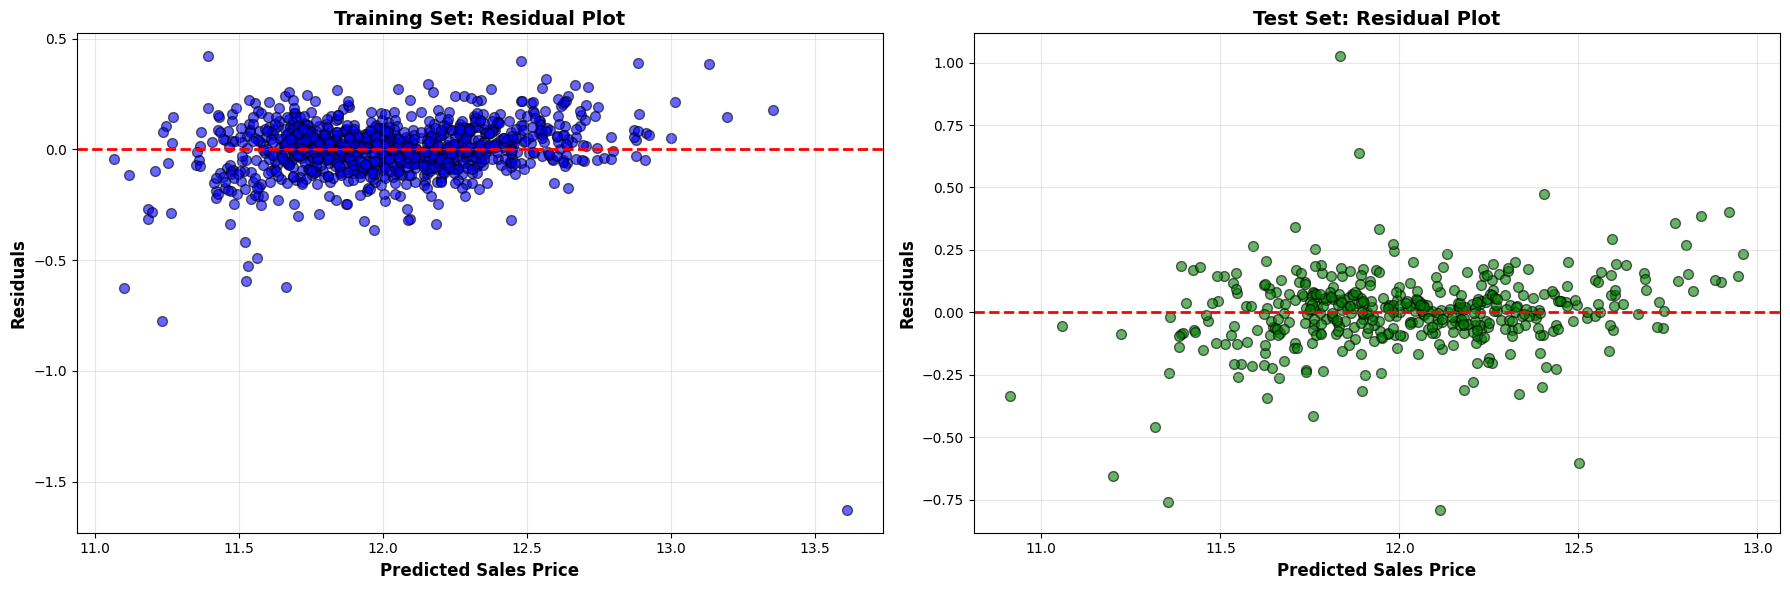

In [60]:
# Residual Analysis
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Training
train_residuals = y_train - y_pred_lasso_train
axes[0].scatter(y_pred_lasso_train, train_residuals, alpha=0.6, color='blue', edgecolors='black', s=50)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Sales Price', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Residuals', fontsize=12, fontweight='bold')
axes[0].set_title('Training Set: Residual Plot', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Test 
test_residuals = y_test - y_pred_lasso_test
axes[1].scatter(y_pred_lasso_test, test_residuals, alpha=0.6, color='green', edgecolors='black', s=50)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Sales Price', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Residuals', fontsize=12, fontweight='bold')
axes[1].set_title('Test Set: Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### - Rige Regression

In [50]:
from sklearn.linear_model import RidgeCV, Ridge

ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print("Alpha : " , ridge_cv.alpha_)
print("Coef : " , ridge_cv.coef_)


Alpha :  100.0
Coef :  [-1.22422934e-02 -2.64134197e-03  1.97145848e-02  5.91249235e-02
  3.06606281e-02  2.00351383e-02  2.40777365e-02  3.94234410e-03
  7.66794704e-03  5.46613865e-03  7.44191946e-03  1.70756384e-02
  3.52121451e-02  2.95652221e-02  2.07890076e-03  5.07184752e-02
  2.02789621e-02  7.25489822e-04  1.92998299e-02  1.26780626e-02
  1.16532707e-02 -1.32217042e-02  1.88357282e-02  1.63611207e-02
 -3.77790243e-03  2.95150411e-02  1.39329520e-02  1.15810784e-02
  2.79782865e-03  4.70906828e-03  6.31354130e-03  9.44724613e-03
 -1.15185799e-02 -1.42077225e-06 -5.18224463e-03  1.17057297e-02
  7.06660106e-03  2.39033253e-02  1.14246490e-02  5.26252468e-03
  2.36735314e-03 -1.15564599e-02  9.18704443e-04  5.58973381e-03
  3.76881245e-03  9.89671706e-03 -3.96471274e-03  9.36603238e-03
 -7.39769343e-03 -3.40619283e-03 -3.09399799e-03  3.68994719e-03
 -6.18867099e-03 -9.22102834e-04 -7.79681400e-03  9.41238063e-04
  9.08238679e-03 -1.71951228e-03  2.24373850e-02 -1.99662862e-02
 -

In [61]:
y_pred_ridge_train = ridge_cv.predict(X_train_scaled)
y_pred_ridge_test = ridge_cv.predict(X_test_scaled)

# Evaluate model performance
ridge_metrics = evaluate_model(y_train, y_test, y_pred_ridge_train, y_pred_ridge_test, "Ridge Regression")

Ridge Regression Summary : 
Training R2: 0.9344
Test R2: 0.8767
R2 Difference: 0.0576 (6.17%)
Training MSE: 0.0103
Test MSE: 0.0203


In [69]:
# Perform RFE with Ridge regression

print(f"Total features before RFE: {X_train_scaled.shape[1]}")

# Use Ridge with a reasonable alpha for RFE
ridge_estimator = Ridge(alpha=100, max_iter=1000)
selector_ridge = RFE(estimator=ridge_estimator, n_features_to_select=60, step=1)
selector_ridge = selector_ridge.fit(X_train_scaled, y_train)

# Transform the data to selected features
X_train_ridge_rfe = selector_ridge.transform(X_train_scaled)
X_test_ridge_rfe = selector_ridge.transform(X_test_scaled)

selected_features_ridge = X_train_scaled.columns[selector_ridge.support_]
print(f"Selected {len(selected_features_ridge)} features for Ridge:")
print(selected_features_ridge.tolist())

print(f"Shape after RFE: {X_train_ridge_rfe.shape}")

# Now use RidgeCV to find optimal alpha on the selected features
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_ridge_rfe, y_train)

print(f"Optimal Alpha: {ridge_cv.alpha_}")
print(f"Number of non-zero coefficients: {np.sum(ridge_cv.coef_ != 0)}")
# Make predictions
y_pred_ridge_train = ridge_cv.predict(X_train_ridge_rfe)
y_pred_ridge_test = ridge_cv.predict(X_test_ridge_rfe)

# Evaluate model performance
ridge_metrics = evaluate_model(y_train, y_test, y_pred_ridge_train, y_pred_ridge_test, "Ridge Regression with RFE")

Total features before RFE: 234
Selected 60 features for Ridge:
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition2_PosN', 'BldgType_Twnhs', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace', 'ExterQual_Gd', 'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'BsmtFinType1_Unf', 'CentralAir_Y', 'KitchenQual_G

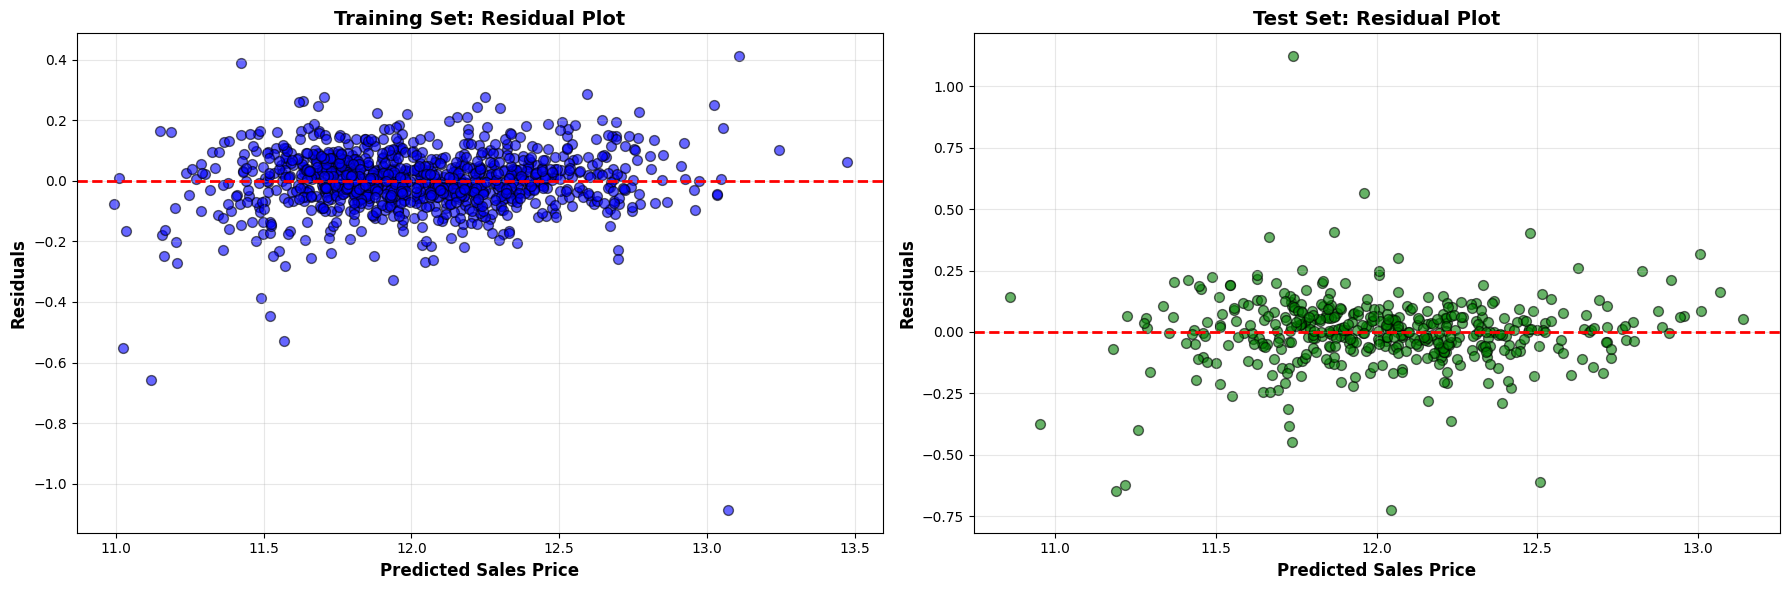

In [ ]:

# Residual Analysis
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Training
train_residuals = y_train - y_pred_ridge_train
axes[0].scatter(y_pred_ridge_train, train_residuals, alpha=0.6, color='blue', edgecolors='black', s=50)
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Sales Price', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Residuals', fontsize=12, fontweight='bold')
axes[0].set_title('Training Set: Residual Plot', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Test 
test_residuals = y_test - y_pred_ridge_test
axes[1].scatter(y_pred_ridge_test, test_residuals, alpha=0.6, color='green', edgecolors='black', s=50)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Sales Price', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Residuals', fontsize=12, fontweight='bold')
axes[1].set_title('Test Set: Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# There is not much difference between the models but Lasso with RFE seems to perform slightly better with less overfitting.